### Exercici 2

- Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

#### Important

- El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

- Descarrego el dataframe aplicant els valors de separació "::" i el codi de format "ISO-8859-1"

In [17]:
movies = pd.read_table('movies.dat', sep='::', engine='python', names= ['Title', 'Genre'], encoding='ISO-8859-1').reset_index(drop=True)
movies.head(10)

,Title,Genre
0,Toy Story (1995),Animation|Children's|Comedy
1,Jumanji (1995),Adventure|Children's|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama
4,Father of the Bride Part II (1995),Comedy
5,Heat (1995),Action|Crime|Thriller
6,Sabrina (1995),Comedy|Romance
7,Tom and Huck (1995),Adventure|Children's
8,Sudden Death (1995),Action
9,GoldenEye (1995),Action|Adventure|Thriller


- Comprovar les columnes que hi ha i la seva forma

In [23]:
columnes = list(movies.columns)
columnes

['Title', 'Genre']

In [30]:
movies.shape

(3883, 2)

- Extreure'm l'any i el posarem a una columna nova

In [31]:
movies['Year'] = movies['Title'].str.extract(r'\((\d{4})\)', expand=True).astype(int)

movies

,Title,Genre,Year
0,Toy Story (1995),Animation|Children's|Comedy,1995
1,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama,1995
4,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
3878,Meet the Parents (2000),Comedy,2000
3879,Requiem for a Dream (2000),Drama,2000
3880,Tigerland (2000),Drama,2000
3881,Two Family House (2000),Drama,2000


In [32]:
movies['Title'] = movies['Title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()
movies.head(5)

,Title,Genre,Year
0,Toy Story,Animation|Children's|Comedy,1995
1,Jumanji,Adventure|Children's|Fantasy,1995
2,Grumpier Old Men,Comedy|Romance,1995
3,Waiting to Exhale,Comedy|Drama,1995
4,Father of the Bride Part II,Comedy,1995


- Canviem l'ordre segons ens demana l'exercici

In [35]:
movies = movies[['Title', 'Year', 'Genre']]
movies.head(5)

,Title,Year,Genre
0,Toy Story,1995,Animation|Children's|Comedy
1,Jumanji,1995,Adventure|Children's|Fantasy
2,Grumpier Old Men,1995,Comedy|Romance
3,Waiting to Exhale,1995,Comedy|Drama
4,Father of the Bride Part II,1995,Comedy


- Ens quedarem amb el primer valor de "Genre" tal com ens demana l'enunciat

In [37]:
movies['Genre']= movies['Genre'].str.extract(r'^([^|]+)')
movies.head(10)

,Title,Year,Genre
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
5,Heat,1995,Action
6,Sabrina,1995,Comedy
7,Tom and Huck,1995,Adventure
8,Sudden Death,1995,Action
9,GoldenEye,1995,Action


- Per acabar comprovarem el tipus de dada, si hi ha valor null i si també té duplicats

In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Year    3883 non-null   int64 
 2   Genre   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [39]:
movies.isnull().sum()

Title    0
Year     0
Genre    0
dtype: int64

In [40]:
movies.duplicated().sum()

0

- De cara a mostrar alguna dada rellevant observarem els valors únics i la quantitat de valors per columna.

In [41]:
for column in movies.columns:
    unique_count = movies[column].nunique()
    unique_values = movies[column].unique()
    print(f"Column '{column}' has {unique_count} unique values:")
    print(unique_values)

Column 'Title' has 3841 unique values:
['Toy Story' 'Jumanji' 'Grumpier Old Men' ... 'Tigerland'
 'Two Family House' 'Contender, The']
Column 'Year' has 81 unique values:
[1995 1994 1996 1976 1993 1992 1988 1967 1964 1977 1965 1982 1962 1990
 1991 1989 1937 1940 1969 1981 1973 1970 1960 1955 1956 1959 1968 1980
 1975 1986 1948 1943 1963 1950 1946 1987 1997 1974 1958 1949 1972 1998
 1933 1952 1951 1957 1961 1954 1934 1944 1942 1941 1953 1939 1947 1945
 1938 1935 1936 1926 1932 1930 1971 1979 1966 1978 1985 1983 1984 1931
 1922 1927 1929 1928 1925 1923 1999 1919 2000 1920 1921]
Column 'Genre' has 18 unique values:
['Animation' 'Adventure' 'Comedy' 'Action' 'Drama' 'Thriller' 'Crime'
 'Romance' "Children's" 'Documentary' 'Sci-Fi' 'Horror' 'Western'
 'Mystery' 'Film-Noir' 'War' 'Fantasy' 'Musical']


### Exercici 3

- Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

- Fes una o dues representacions gràfiques i justifica la teva elecció.

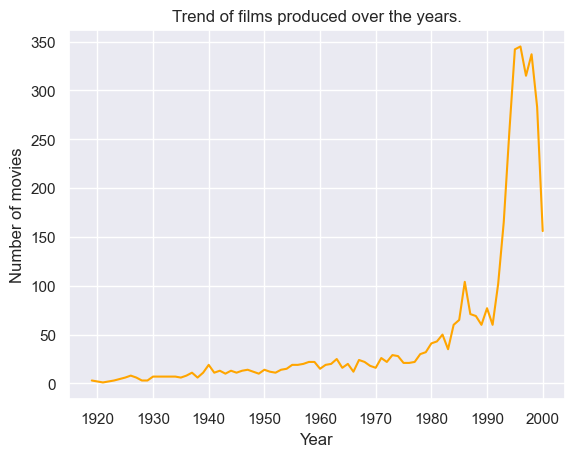

In [48]:
movies_per_year = movies['Year'].value_counts().sort_index()

sns.lineplot(data=movies_per_year, color='orange')
plt.title('Trend of films produced over the years.')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

In [53]:
movies_per_year

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Year, Length: 81, dtype: int64

<Axes: xlabel='Year', ylabel='Density'>

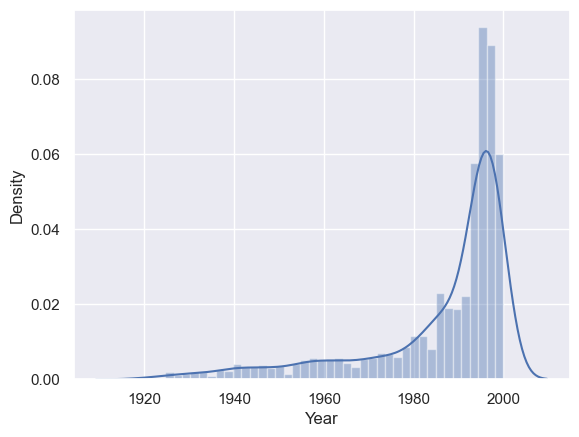

In [49]:
sns.set_theme()
sns.distplot(movies['Year'])

- Podem observar que al llarg del temps la producció de pel·lícules ha anat en augment i que, per tant, la indústria ha crescut considerablement.

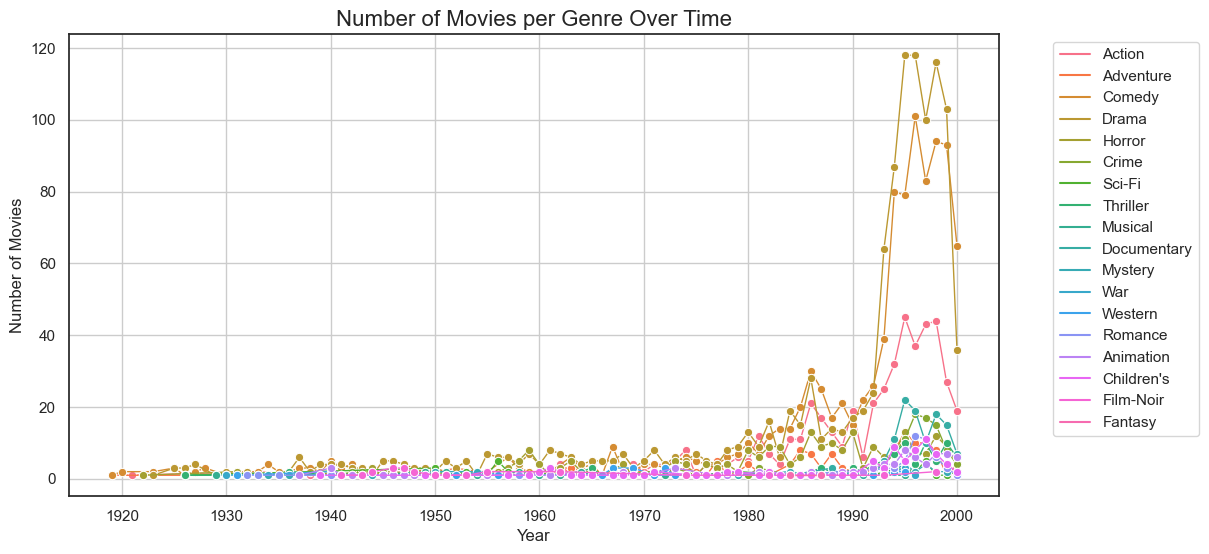

In [51]:
movies_by_genre_year = movies.groupby(['Year', 'Genre']).size().reset_index(name='Number of Movies')

plt.figure(figsize=(12, 6))
sns.lineplot(data=movies_by_genre_year, x='Year', y='Number of Movies', hue='Genre', marker='o', markersize=6, linewidth=1)
plt.title('Number of Movies per Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

- Podem observar que els gèneres que més han augmentat són Drama, Comedy i Action. A l'altre extrem trobem Film Noir, Western que fa uns anys estaven més igualats.

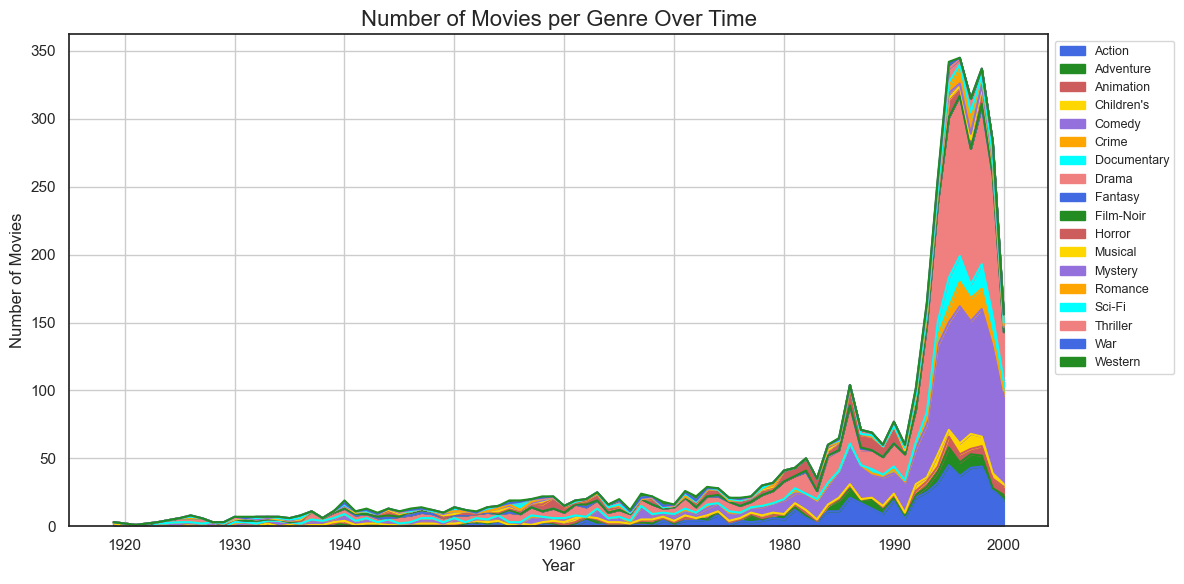

In [57]:
movies_by_genre_year = movies.groupby('Year')['Genre'].value_counts().unstack(fill_value=0)

colors = ['royalblue', 'forestgreen', 'indianred', 'gold', 'mediumpurple', 'orange', 'cyan', 'lightcoral']

ax = movies_by_genre_year.plot(kind='area', stacked=True, figsize=(12, 6), color=colors)

plt.title('Number of Movies per Genre Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.legend(loc='upper left', fontsize=9, bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

plt.show()


In [64]:
movies_by_genre_year = movies.pivot_table(index='Genre', columns='Year', aggfunc='size', fill_value=0)

movies_by_genre_year.head(18)

Year,1919,1920,1921,1922,1923,1925,1926,1927,1928,1929,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Genre,,,,,,,,,,,,,,,,,,,,,
Action,1,0,1,0,0,0,0,0,0,0,...,6,21,25,32,45,37,43,44,27,19
Adventure,1,0,0,0,0,0,1,0,0,0,...,2,2,4,8,13,10,10,8,1,4
Animation,0,0,0,0,0,0,0,0,0,0,...,2,3,4,4,8,6,4,7,7,6
Children's,0,0,0,0,0,0,0,0,0,0,...,0,5,3,9,5,8,11,7,4,2
Comedy,1,2,0,0,2,3,1,2,3,0,...,22,26,39,80,79,101,83,94,93,65
Crime,0,0,0,0,0,0,1,0,0,0,...,1,4,4,7,11,18,17,15,8,4
Documentary,0,0,0,0,0,0,0,0,0,0,...,1,1,5,11,22,19,10,18,15,7
Drama,0,0,0,1,1,3,3,4,0,1,...,19,24,64,87,118,118,100,116,103,36
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
